# Analysis on AB test results using Python. I will conduct a hypothesis test to see if the conversion rate difference is significant

In [9]:
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest


In [2]:
df = pd.read_csv('files/ab_test_results.csv')

df


,page_version,total_users,converted_users,conversion_rate
0,A,494,156,0.3158
1,B,506,157,0.3103


In [12]:
print(df.to_markdown())

|    | page_version   |   total_users |   converted_users |   conversion_rate |
|---:|:---------------|--------------:|------------------:|------------------:|
|  0 | A              |           494 |               156 |            0.3158 |
|  1 | B              |           506 |               157 |            0.3103 |


Visualizations of the results

In [ ]:
vis = px.bar(df, x='page_version', y='conversion_rate', labels={
        'page_version': 'Page Version',
        'conversion_rate': 'Conversion Rate (%)'
        },
        title="Conversion Rate by Page Version"
    )

vis.show()

In [22]:
vis.write_html('test.html')

Lets check if this difference is statistically significant by conducating a hypothesis test.

Null Hypothesis (H₀): The conversion rates are the same for A and B (no effect).

Alternative Hypothesis (H₁): The conversion rates are different (or one is higher).

Conducting a z-test 

In [6]:
n_A, x_A, n_B, x_B = df['total_users'][0], df['converted_users'][0], df['total_users'][1], df['converted_users'][1]

x_B


np.int64(157)

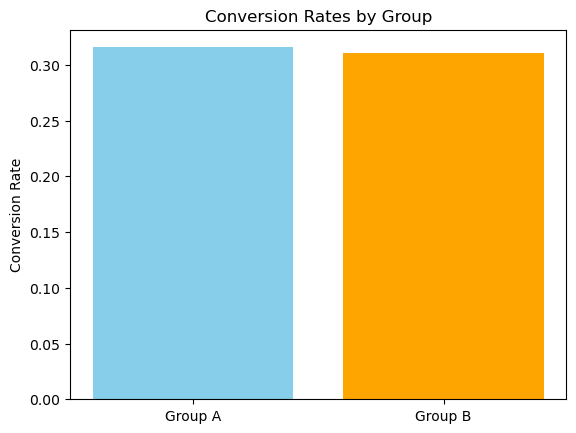

In [13]:
import matplotlib.pyplot as plt

labels = ['Group A', 'Group B']
conversion_rates = [x_A/n_A, x_B/n_B]

plt.bar(labels, conversion_rates, color=['skyblue', 'orange'])
plt.title("Conversion Rates by Group")
plt.ylabel("Conversion Rate")
plt.show()

p = (x_A + x_B) / (n_A + n_B):

is the pooled proportion under the null hypothesis.

Reason:

We pool because under H₀, both groups share the same conversion probability.

The denominator adjusts for variability from both groups (standard error).

In [10]:
# Data
successes = [x_A, x_B]
samples = [n_A, n_B]

# Perform two-proportion z-test
z_stat, p_val = proportions_ztest(successes, samples)

print("z-statistic:", z_stat)
print("p-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Significant! There's evidence of a difference in conversion rates.")
else:
    print("Not significant. No strong evidence of a difference.")

z-statistic: 0.18795762442489528
p-value: 0.8509098698735538
Not significant. No strong evidence of a difference.


There is no significant difference between the two check out pages.